# Exploratory Data Analysis
### Understanding the characteristics of the textual data itself. 
The goal is to identify patterns, anomalies, and necessary preprocessing steps before training a model.

In [50]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import re
from collections import Counter
from datasets import load_dataset

In [2]:
# Loading dataset
recipes_df = load_dataset("json", data_files="../data/recipe.json")
df = recipes_df["train"].to_pandas()
df.head()

,recipe_title,category,subcategory,description,ingredients,directions,num_ingredients,num_steps
0,Air Fryer Potato Slices with Dipping Sauce,Air Fryer Recipes,Air Fryer Recipes,"These air fryer potato slices, served with a b...","[3/4 cup ketchup, 1/2 cup beer, 1 tablespoon W...","[Combine ketchup, beer, Worcestershire sauce, ...",9,5
1,Gochujang Pork Belly Bites,Air Fryer Recipes,Air Fryer Recipes,These gochujang pork belly bites are sweet and...,"[1 pound pork belly, 1/4 cup gochujang, 2 tabl...",[Preheat an air fryer to 400 degrees F (200 de...,5,4
2,3-Ingredient Air Fryer Everything Bagel Chicke...,Air Fryer Recipes,Air Fryer Recipes,These 3-ingredient air fryer everything bagel ...,"[1 ¼ pounds chicken tenders, 1 tablespoon oliv...",[Gather all ingredients. Preheat an air fryer ...,3,4
3,Air Fryer Everything Bagel Chicken Cutlets,Air Fryer Recipes,Air Fryer Recipes,These air fryer everything bagel chicken cutle...,"[4 chicken cutlets (about 1 pound total), salt...",[Preheat an air fryer to 400 degrees F (200 de...,9,9
4,Air Fryer Honey Sriracha Salmon Bites,Air Fryer Recipes,Air Fryer Recipes,These air fryer honey Sriracha salmon bites ar...,"[1 tablespoon soy sauce, 1 tablespoon honey, 1...",[Preheat an air fryer to 400 degrees F (200 de...,5,5


In [46]:
# Viewing content of first record
recipes_df["train"][0]

{'recipe_title': 'Air Fryer Potato Slices with Dipping Sauce',
 'category': 'Air Fryer Recipes',
 'subcategory': 'Air Fryer Recipes',
 'description': "These air fryer potato slices, served with a beer ketchup dipping sauce, are a tasty finger food somewhere between a French fry and a potato chip. Do take the time to make the dipping sauce—it's worth it.",
 'ingredients': ['3/4 cup ketchup',
  '1/2 cup beer',
  '1 tablespoon Worcestershire sauce',
  '1/2 teaspoon onion powder',
  '1/4 teaspoon cayenne',
  '2 baking potatoes',
  'olive oil cooking spray',
  '1/2 teaspoon garlic powder',
  'salt and freshly ground black pepper'],
 'directions': ['Combine ketchup, beer, Worcestershire sauce, onion powder, and cayenne in a small saucepan. Bring to a boil, then reduce heat, and simmer for 3 to 5 minutes. Remove from heat, and cool. Cover and store in the refrigerator until ready to use.',
  'Preheat the air fryer to 400 degrees F (200 degrees C). Spray the basket with cooking spray or line w

In [4]:
# Number of rows and columns
df.shape

(62126, 8)

In [5]:
# Concise summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62126 entries, 0 to 62125
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   recipe_title     62126 non-null  object
 1   category         62126 non-null  object
 2   subcategory      62126 non-null  object
 3   description      62126 non-null  object
 4   ingredients      62126 non-null  object
 5   directions       62126 non-null  object
 6   num_ingredients  62126 non-null  int64 
 7   num_steps        62126 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 3.8+ MB


In [6]:
# Missing values
df.isna().sum()

recipe_title       0
category           0
subcategory        0
description        0
ingredients        0
directions         0
num_ingredients    0
num_steps          0
dtype: int64

In [7]:
# Duplicates
duplicates_df = df[df.duplicated(keep=False, subset=["recipe_title", "description"])]
len(duplicates_df)

51460

In [8]:
# Inspecting records with their matching duplicates
duplicates_df.sort_values(by=["recipe_title", "description"])[0:9]

,recipe_title,category,subcategory,description,ingredients,directions,num_ingredients,num_steps
15989,"""Black Magic"" Chocolate Chip Cookies",Chocolate Chip Cookies,Chocolate Chip Cookies,"Chef John's ""black magic"" chocolate chip cooki...","[1 cup unsalted butter, soft, 1 cup white suga...","[Beat butter, white sugar, and brown sugar tog...",11,5
17650,"""Black Magic"" Chocolate Chip Cookies",Christmas Cookies,Chocolate Chip Cookies,"Chef John's ""black magic"" chocolate chip cooki...","[1 cup unsalted butter, soft, 1 cup white suga...","[Beat butter, white sugar, and brown sugar tog...",11,5
21250,"""Black Magic"" Chocolate Chip Cookies",Cookies,Chocolate Chip Cookies,"Chef John's ""black magic"" chocolate chip cooki...","[1 cup unsalted butter, soft, 1 cup white suga...","[Beat butter, white sugar, and brown sugar tog...",11,5
34013,"""Black Magic"" Chocolate Chip Cookies",Halloween,Halloween Cookies,"Chef John's ""black magic"" chocolate chip cooki...","[1 cup unsalted butter, soft, 1 cup white suga...","[Beat butter, white sugar, and brown sugar tog...",11,5
30851,"""CranCrack"" Cranberry Salad",Fruit Salads,Fruit Salads,"This was my mothers recipe, and named by my so...","[1 (12 ounce) package fresh cranberries, 1 lar...",[Process cranberries and orange in a food proc...,6,2
38999,"""CranCrack"" Cranberry Salad",Jell-O Salads,Jell-O Salads,"This was my mothers recipe, and named by my so...","[1 (12 ounce) package fresh cranberries, 1 lar...",[Process cranberries and orange in a food proc...,6,2
16570,"""Egg Not"" (Eggless Eggnog)",Christmas,Christmas Drink Recipes,I developed this recipe because of my love for...,"[5 cups milk, divided, ½ cup white sugar, 1 (3...","[Blend 2 cups milk, sugar, pudding mix, rum-fl...",7,1
17092,"""Egg Not"" (Eggless Eggnog)",Christmas,Eggnog,I developed this recipe because of my love for...,"[5 cups milk, divided, ½ cup white sugar, 1 (3...","[Blend 2 cups milk, sugar, pudding mix, rum-fl...",7,1
28350,"""Egg Not"" (Eggless Eggnog)",Eggnog,Eggnog,I developed this recipe because of my love for...,"[5 cups milk, divided, ½ cup white sugar, 1 (3...","[Blend 2 cups milk, sugar, pudding mix, rum-fl...",7,1


For each set of duplicates, we identified that the content is identical but has different categories and subcategories. This is because they've been classified across:
- Seasonal categories (Christmas, Halloween)
- Use-case categories (Cookies, Fruit salads)
- High-level categories (Desserts, Snacks)
- Ingredient-based categories (Eggnog category)

For a recipe recommendation system based on available ingredients,
- They do create redundancy and may bias similarity/recommendation scores.
- They also inflate the dataset artificially.
- Removing or consolidating them improves search, embeddings, clustering, and recall quality.

**We need a clean, unique recipe dataset.**

In [9]:
# Detecting duplicates across lists and strings, ignoring order and case
def normalize_column(col):
    """
    Normalize a column for duplicate detection:
    - Strings → lowercase, stripped
    - Lists/arrays → lowercase, stripped, sorted, converted to tuple
    """
    if isinstance(col, str):
        return col.strip().lower()
    elif isinstance(col, (list, np.ndarray)):
        # Lowercase each element, strip spaces, sort, convert to tuple
        cleaned = tuple(sorted([str(x).strip().lower() for x in col]))
        return cleaned
    return col

# Columns to check for duplicates
cols_to_check = ["recipe_title", "description", "ingredients", "directions"]

# Create normalized columns
normalized_cols = {col: df[col].apply(normalize_column) for col in cols_to_check}

# Combine into a DataFrame
norm_df = df.assign(**normalized_cols)

# Find duplicates
duplicates_norm_df = norm_df[norm_df.duplicated(subset=cols_to_check, keep=False)]

print(f"Number of duplicates: {len(duplicates_norm_df)}")

Number of duplicates: 51458


***Before normalization***
- Checked duplicates only on `["recipe_title", "description"]`.
- Result: 51,460 duplicates. This means that many recipes have identical titles and descriptions, ignoring ingredients and directions.
- Ingredients and directions weren't considered, so two recipes with the same title/description but different ingredients/directions would still count as duplicates.

***After normalization***
- Checked duplicates on `["recipe_title", "description", "ingredients", "directions"]`.
- Result: 51,458 duplicates.
- Why fewer? Only 2 recipes that had identical title+description actually differ in ingredients or directions.
- Normalization ensures lists are sorted and strings are lowercased and stripped
- So now duplicates are more strict and precise, not just title/description.

***What this tells us***
- Most duplicates were indeed exact duplicates in title/description, regardless of ingredients/directions.
- Only 2 cases have the same title/description but different ingredients/directions.

In [10]:
# Some aspects of the exploration will require using data that has no duplicates
deduplicated_df = norm_df.drop_duplicates(subset=["recipe_title", "description", "ingredients", "directions"])
deduplicated_df = deduplicated_df.copy()

## Category & Subcategory Analysis

In [39]:
# Number of categories
print(f"Number of categories in raw dataset: {df["category"].str.lower().nunique()}")

# Number of categories after removing duplicates
print(f"Number of categories in deduplicated dataset: {deduplicated_df["category"].str.lower().nunique()}")

Number of categories in raw dataset: 267
Number of categories in deduplicated dataset: 219


In [42]:
# Highest and lowest count per category
cat_counts1 = df["category"].value_counts()
cat_counts2 = deduplicated_df["category"].value_counts()

# df
top_category1 = cat_counts1.idxmax()
top_c_count1 = cat_counts1.max()
bottom_category1 = cat_counts1.idxmin()
bottom_c_count1 = cat_counts1.min()

# deduplicated_df
top_category2 = cat_counts2.idxmax()
top_c_count2 = cat_counts2.max()
bottom_category2 = cat_counts2.idxmin()
bottom_c_count2 = cat_counts2.min()

print("Raw dataset:")
print(f"Top Category: {top_category1} ({top_c_count1})")
print(f"Bottom Category: {bottom_category1} ({bottom_c_count1})")
print("\nDeduplicated dataset:")
print(f"Top Category: {top_category2} ({top_c_count2})")
print(f"Bottom Category: {bottom_category2} ({bottom_c_count2})")

Raw dataset:
Top Category: Main Dishes (3387)
Bottom Category: Waldorf Salads (2)

Deduplicated dataset:
Top Category: Appetizers And Snacks (1594)
Bottom Category: Divinity (1)


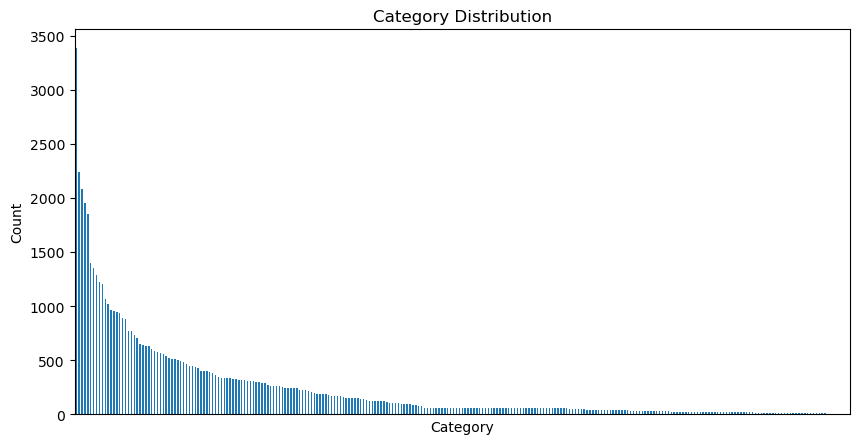

In [14]:
# Category distribution
plt.figure(figsize=(10,5))
df['category'].value_counts().plot(kind='bar')
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(ticks=[])
plt.show()

In [40]:
# Number of subcategories
print(f"Number of subcategories in raw dataset: {df["subcategory"].str.lower().nunique()}")

# Number of subcategories after removing duplicates
print(f"Number of subcategories in deduplicated dataset: {deduplicated_df["subcategory"].str.lower().nunique()}")

Number of subcategories in raw dataset: 1032
Number of subcategories in deduplicated dataset: 959


In [43]:
# Highest and lowest count per subcategory
subcat_counts1 = df["subcategory"].value_counts()
subcat_counts2 = deduplicated_df["subcategory"].value_counts()

# df
top_subcategory1 = subcat_counts1.idxmax()
top_sc_count1 = subcat_counts1.max()
bottom_subcategory1 = subcat_counts1.idxmin()
bottom_sc_count1 = subcat_counts1.min()

# deduplicated_df
top_subcategory2 = subcat_counts2.idxmax()
top_sc_count2 = subcat_counts2.max()
bottom_subcategory2 = subcat_counts2.idxmin()
bottom_sc_count2 = subcat_counts2.min()

print("Raw dataset:")
print(f"Top Category: {top_category1} ({top_sc_count1})")
print(f"Bottom Category: {bottom_category1} ({bottom_sc_count1})")
print("\nDeduplicated dataset:")
print(f"Top Category: {top_category2} ({top_sc_count2})")
print(f"Bottom Category: {bottom_category2} ({bottom_sc_count2})")

Raw dataset:
Top Category: Main Dishes (320)
Bottom Category: Waldorf Salads (1)

Deduplicated dataset:
Top Category: Appetizers And Snacks (64)
Bottom Category: Divinity (1)


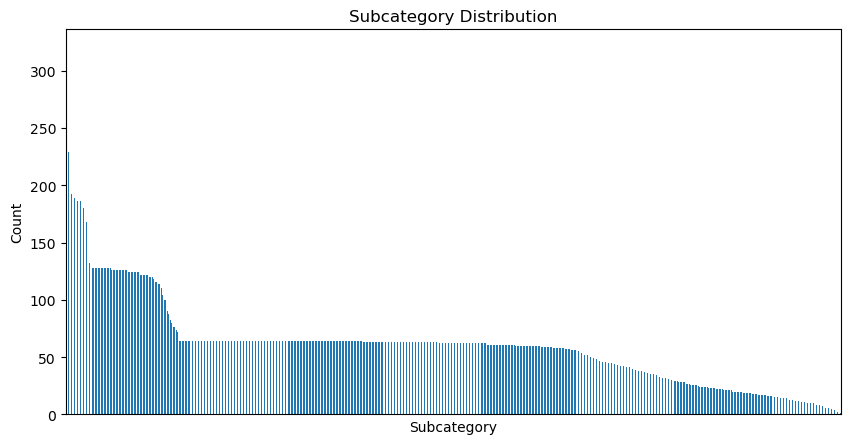

In [18]:
# Sub-category distribution
plt.figure(figsize=(10,5))
df['subcategory'].value_counts().plot(kind='bar')
plt.title("Subcategory Distribution")
plt.xlabel("Subcategory")
plt.ylabel("Count")
plt.xticks(ticks=[])
plt.show()

## Token Count in Recipe Title and Description

In [35]:
# Defining function to get length of tokens for recipe_title and description fields
nlp_tok = spacy.load("en_core_web_sm", disable=["tagger", "parser", "ner", "lemmatizer", "attribute_ruler"])
# Some pipeline components were disbaled because we’re only counting tokens and checking if a token is punctuation, whitespace, or a stopword.
stopwords = nlp_tok.Defaults.stop_words

def spacy_cleaned_word_count(text):
    if not isinstance(text, str):
        return 0
    
    # Lowercasing helps spaCy handle tokens consistently
    doc = nlp_tok(text.lower())
    
    # Count tokens that are:
    # - not punctuation
    # - not whitespace
    # - not stopwords
    return sum(
        1 for token in doc
        if not token.is_punct
        and not token.is_space
        and token.text not in stopwords
    )

In [36]:
# Creating new fields containing the number of tokens
deduplicated_df["recipe_title_len"] = deduplicated_df["recipe_title"].apply(spacy_cleaned_word_count)
deduplicated_df["description_len"] = deduplicated_df["description"].apply(spacy_cleaned_word_count)

In [44]:
deduplicated_df.head()

,recipe_title,category,subcategory,description,ingredients,directions,num_ingredients,num_steps,recipe_title_len,description_len
0,air fryer potato slices with dipping sauce,Air Fryer Recipes,Air Fryer Recipes,"these air fryer potato slices, served with a b...","(1 tablespoon worcestershire sauce, 1/2 cup be...","(combine ketchup, beer, worcestershire sauce, ...",9,5,6,20
1,gochujang pork belly bites,Air Fryer Recipes,Air Fryer Recipes,these gochujang pork belly bites are sweet and...,"(1 pound pork belly, 1 tablespoon honey,, 1 te...","(meanwhile, for sauce, stir gochujang, soy sau...",5,4,4,20
2,3-ingredient air fryer everything bagel chicke...,Air Fryer Recipes,Air Fryer Recipes,these 3-ingredient air fryer everything bagel ...,"(1 tablespoon olive oil, 1 ¼ pounds chicken te...",(gather all ingredients. preheat an air fryer ...,3,4,7,40
3,air fryer everything bagel chicken cutlets,Air Fryer Recipes,Air Fryer Recipes,these air fryer everything bagel chicken cutle...,"(1 1/2 cups panko breadcrumbs, 2 large eggs, 2...",(add cutlets to the bag with flour. seal the b...,9,9,5,17
4,air fryer honey sriracha salmon bites,Air Fryer Recipes,Air Fryer Recipes,these air fryer honey sriracha salmon bites ar...,"(1 tablespoon honey, 1 tablespoon soy sauce, 1...",(cook in the preheated air fryer for 4 minutes...,5,5,6,35


In [48]:
# Maximum lenghts for recipe title and description
print(f"Maximum length for recipe title tokens {deduplicated_df["recipe_title_len"].max()}")
print(f"Maximum length for description tokens {deduplicated_df["description_len"].max()}")

Max length for recipe title tokens 13
Max length for description tokens 72


In [49]:
# Maximum lenghts for recipe title and description
print(f"Minimum length for recipe title tokens {deduplicated_df["recipe_title_len"].min()}")
print(f"Minimum length for description tokens {deduplicated_df["description_len"].min()}")

Min length for recipe title tokens 1
Min length for description tokens 1


***Visualizing token length distributions***

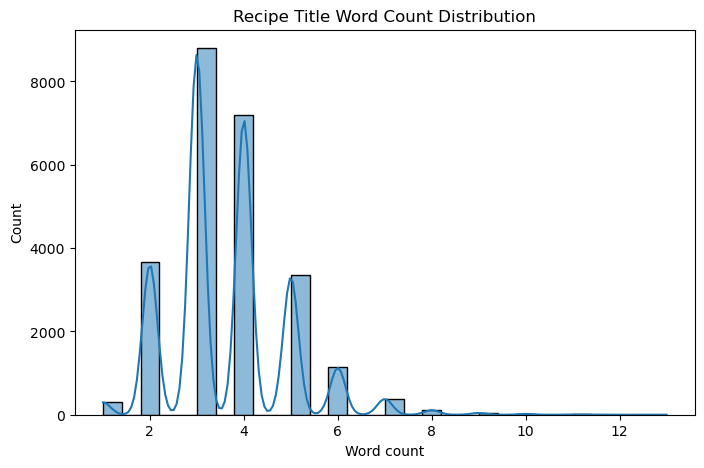

In [37]:
# Recipe Title Length
plt.figure(figsize=(8,5))
sns.histplot(deduplicated_df["recipe_title_len"], bins=30, kde=True)
plt.title("Recipe Title Word Count Distribution")
plt.xlabel("Word count")
plt.show()

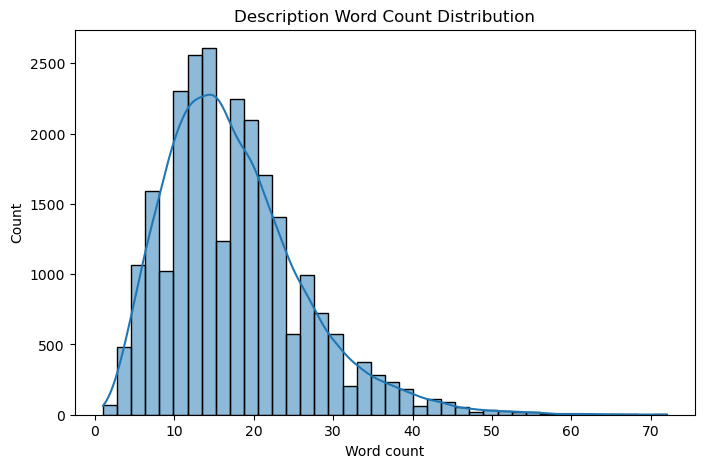

In [38]:
# Description length
plt.figure(figsize=(8,5))
sns.histplot(deduplicated_df["description_len"], bins=40, kde=True)
plt.title("Description Word Count Distribution")
plt.xlabel("Word count")
plt.show()

## 🥕 INGREDIENT-CENTRIC ANALYSIS

In [ ]:
nlp = spacy.load("en_core_web_sm")  # for lemmatization

def clean_ingredient(ing):
    ing = ing.lower().strip()
    
    # 1. Remove quantities (fractions, decimals, integers)
    ing = re.sub(r'(\d+/\d+|\d+(\.\d+)?)', '', ing)
    
    # 2. Remove units
    units = ['cup', 'cups', 'tablespoon', 'tablespoons', 'tsp', 'teaspoon', 'teaspoons',
             'oz', 'ounce', 'ounces', 'lb', 'pound', 'pounds', 'gram', 'grams', 'kg', 'kilogram', 'kilograms', 'small', 'large']
    pattern = r'\b(?:' + '|'.join(units) + r')\b'
    ing = re.sub(pattern, '', ing)
    
    # 3. Remove extra words often used for preparation
    prep_words = ['fresh', 'freshly', 'ground', 'minced', 'chopped', 'diced', 'sliced', 
                  'baking', 'cooking', 'spray', 'for garnish', 'to taste']
    pattern2 = r'\b(?:' + '|'.join(prep_words) + r')\b'
    ing = re.sub(pattern2, '', ing)
    
    # 4. Remove punctuation
    ing = re.sub(r'[^\w\s]', '', ing)
    
    # 5. Split compound ingredients like 'salt and pepper'
    parts = re.split(r'\band\b|\&', ing)
    parts = [p.strip() for p in parts if p.strip()]
    
    # 6. Lemmatize using SpaCy
    cleaned_parts = []
    for p in parts:
        doc = nlp(p)
        lemmas = [tok.lemma_ for tok in doc if tok.is_alpha]
        if lemmas:
            cleaned_parts.append(' '.join(lemmas))
    
    return cleaned_parts

# Apply to dataset
deduplicated_df['clean_ingredients'] = deduplicated_df['ingredients'].apply(lambda lst: [i for ing in lst for i in clean_ingredient(ing)])

# Preview
deduplicated_dfdf[['ingredients', 'clean_ingredients']].head()

## Next steps to take...
1. Delete duplicates based on this subset `["recipe_title", "description", "ingredients", "directions"]`.
2. Rid ingredients of quantities (e.g., 3/4 cup, 1 tablespoon,...), units (cup, tablespoon, teaspoon,...), preparation descriptors (baking, cooking spray, freshly ground,...), and compound ingredients (salt and freshly ground black pepper)